# Previous Lesson Overview - Day 11 Seaborn_some_SciPy

In the previous lesson you learned about seaborn and scipy, how to:

1. Explore data with the seaborn plotting library
2. Write functions to make figures from daframes
3. Make figures with FacetGrid and save figures
4. Reference SciPy for stats

# Day 12: MAPS and Gifs
We will learn how to create maps, gifs, and a brief intro to .py/.sh

# Goals:

Students will be able to :

1. Create a map with cartopy
2. Add points to maps
3. Save maps
3. Use xarray to open .nc files
3. Make gifs
4. know where to start with .py/.sh scripts

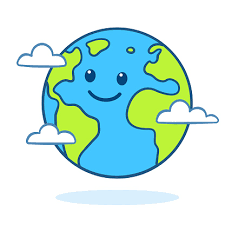

# System version when preparing this notebook
- python 3.8.11
- padas 1.1.3
- numpy 1.20.3
- Seaborn 0.11.1
- netCDF 1.5.3
- xarray 0.19.0
- cartopy 0.18.0

This lesson was prepared by Maria D Hernandez Limon for NRT Environment Science Bootcamps 2021.

# Set-up working space
If when you load the libraries you get a message saying you don't have something follow these steps.

1. Open a new terminal - don't close the one with this notebook
under new -where you add notebooks, open a terminal - continue


2. load libraries with conda by typing each of the following commands to the terminal (one by one) and following the command prompts you get


3. commands:
- conda install -c anaconda netcdf4
- conda install -c conda-forge xarray 
- conda install -c conda-forge cartopy 

4.once installation is complete, restart this notebook. Kernel>Restart then try importing libraries again.

In [ ]:
#Set-up working space
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
%matplotlib inline

#seaborn - more advanced plotting options
import seaborn as sns

In [ ]:
import netCDF4 as nc
import xarray as xr
import cartopy

In [ ]:
#sanity check my versions
print (xr.__version__)

In [ ]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'

# 19. MAPS

### [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) Python library for maps.

### [Good Cartopy Intro](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)
### [Good Tutorial](https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map)

In [ ]:
import cartopy.crs as crs
import cartopy.feature as cfeature

In [ ]:
#create a new figure and add on via ax
plt.figure(figsize=(8,6))

#we will add a projection of the map to ax then add to it
ax = plt.axes(projection=crs.PlateCarree())

plt.show()

In [ ]:
?crs.PlateCarree

## 19.1 [List of Cartopy Projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)

In [ ]:
plt.figure(figsize=(8,6))

#flat projection
ax = plt.axes(projection=crs.PlateCarree())

#add coastline
ax.coastlines()
#add countries
ax.add_feature(cfeature.BORDERS, linestyle="-")
#add lakes
ax.add_feature(cfeature.LAKES, color="blue")

plt.show()

In [ ]:
plt.figure(figsize=(8,6))

#more realistic spherical projection
ax = plt.axes(projection=crs.Orthographic())

#add coastline
ax.coastlines()
#add ocean
ax.add_feature(cartopy.feature.OCEAN,color='blue')

#add countries
ax.add_feature(cfeature.BORDERS,color='white')
#add land
ax.add_feature(cartopy.feature.LAND,color='green')


plt.show()

## 19.2 Slecting a region

In [ ]:
#the center point for the map
central_lat = 37.5
central_lon = -96
#extent is the [west_pont,east_pont,south_point,north_point]
extent = [-120, -70, 24, 50.5]

#create figure
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))

#set_extend limits the size of our region for a better view
ax.set_extent(extent)

#add land
ax.add_feature(cartopy.feature.LAND, edgecolor='black')

#add the globe gridlines
ax.gridlines()

plt.show()

In [ ]:
central_lat = 37.5
central_lon = -96
#extent is the [west_point,east_point,south_point,north_point]
extent = [-120, -70, 24, 50.5]

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)

#add more features -- se hyperlinks above for more info
ax.add_feature(cartopy.feature.OCEAN,color='lightblue')
ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='brown')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black',color='lightblue')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

##add points
## the tranform here, tranforms the data to match the map layout
plt.scatter(x=-96, y=37.5,color="yellow",s=30,alpha=1,transform=crs.Orthographic())

plt.show()

## 19.3 add points from a frame you make

In [ ]:
#make quick dataframe with info
my_df=pd.DataFrame({'City':['PVD','NYC','CHI'],
                   'Lat':[41.8,40.8,41.7],
                   'Lon':[-71,-73,-87.6]})

my_df

In [ ]:
#location of some central point in your map
central_lat = 37.5
central_lon = -96
#extent is the [west_point,east_point,south_point,north_point]
extent = [-120, -70, 24, 50.5]

#the map
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)

#the features
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

##add multiple points -- to add multiple points we use scatteplot but we must pass crs.PlateCarree() in transform,
#maybe there are other ways but this is teh only way it works for me
ax.scatter(x=my_df.Lon, y=my_df.Lat,color="red",s=40,transform=crs.PlateCarree())

plt.show()

## 19.4 add points from a table

In [ ]:
gl_stations=pd.read_csv(datadirectory+'gl_stations.csv')
gl_stations

#### Note: Z-order example

In [ ]:
central_lat = gl_stations['LATITUDE'].mean()
central_lon = gl_stations['LONGITUDE'].mean()
#extent is the [west_point,east_point,south_point,north_point]
extent = [gl_stations['LONGITUDE'].min()-2, gl_stations['LONGITUDE'].max()+2, gl_stations['LATITUDE'].min()-2, gl_stations['LATITUDE'].max()+2]

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.LAKES,edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
#setting labels to true will give me labels on x and y axis
ax.gridlines(draw_labels=True)

##add multiple points -- to add multiple points we use scatteplot but we must pass crs.PlateCarree() in transform,
#maybe there are other ways but this is teh only way it works for me
ax.scatter(x=gl_stations.LONGITUDE, y=gl_stations.LATITUDE,color="red",
            s=30,alpha=0.8,transform=crs.PlateCarree(),zorder=2)

#add labels
ax.set_title('LAURENTIAN GREAT LAKES: EPA SAMPLING STATIONS')

##### THE Z-ORDER is the order in which layers are shown where 0 is first and the higher is on top, I called zorder to 2 so I could see my points 

#I save most of my figures as .pdf until I'm ready to make manuscript figures
#you can save your plots whiever way you prefer, same commands as other plots 
plt.savefig(data_out_directory+'gl_map.pdf')
plt.show()

# 19.5 points across the world

Start by selecting a flat projection like PlateCarree.

In [ ]:
my_df=pd.DataFrame({'City':['MEX','Mali','Shiyan'],
                   'Lat':[18,19,32],
                   'Lon':[-102,-2,110]})

plt.figure(figsize=(12, 6))

ax = plt.axes(projection=crs.PlateCarree())

#add more to the map
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN,color='lightblue')
ax.add_feature(cartopy.feature.LAND,color='green')

#gloabl will give us the whole view and not just the region near our points --add this line after you've added
#mofified the map 
ax.set_global()

#add my points
ax.scatter(x=my_df.Lon, y=my_df.Lat,color="red",s=60,marker='x',transform=crs.PlateCarree())

plt.show()

# 19. Skill Check
Modify the code below to plot some points. Head over to google maps to find coordinates. 

There is no answer key, everyone will have a different map. Refer to my previous examples for help.

I suggest: city where you were born, went to college, vacation spot?

If you finish early then try making another map where you use ax.set_extent() and plot a smaller region.

In [ ]:
##add your points here
my_df=pd.DataFrame({'City':['PVD','NYC','CHI'],
                   'Lat':[41.8,40.8,41.7],
                   'Lon':[-71,-73,-87.6]})


plt.figure(figsize=(12, 6))

ax = plt.axes(projection=crs.PlateCarree())

####add more to the map
ax.coastlines()

###add a title


#gloabl will give us the whole view and not just the region near our points --add this line after you've added
#mofified the map 
ax.set_global()

####change the view of your points
ax.scatter(x=my_df.Lon, y=my_df.Lat,color="red",s=60,marker='x',transform=crs.PlateCarree())

#save your map-uncomment line and change file name
#plt.savefig(data_out_directory+'map_name.pdf')

#then show, if you run show before save you will not save anything 
plt.show()

# BREAK 5mins

# 20. GIFS (from .nc)

For this examples I will use sea surface temperature for 2020.
Download the 2020 file found [here](https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=132&tid=94833&vid=2423) and save in the data folder for class.

NOAA High Resolution SST data provided by the NOAA/OAR/ESRL PSL, Boulder, Colorado, USA, from their [Web site](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html)

To read in the .nc file for sst I am going to use xarray. Xarray is very powerful and user friendly but I don't have time to go over time, here is a good resource.

### [xarray](https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/)  

In [ ]:
temp_2020=xr.open_dataset(datadirectory+'sst.day.mean.2020.nc')
temp_2020

Let's select the sst variable, as we would slect a column from a pd.Dataframe

In [ ]:
temp_2020['sst']

We can see that sst holds 366 values for each time, to grab one day we will index as we would a list.

In [ ]:
temp_2020['sst'][0]

Now we only have data for 2020-01-01. Let's plot this day using imshow.

More in [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)- Simply it allows us to quickly display image data (with many points). We are not making a plot to save.

In [ ]:
plt.imshow(temp_2020['sst'][0],origin='lower')

Let's subset the data so we finish our movie faster.

In [ ]:
temp_subset=temp_2020.sel(time=slice('2020-05', '2020-11'))
temp_subset

Let's make a pretty plot and then make many copies of it to make our gif frames.

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#set my data- I need all the lat, lon but only 1 time
lat=temp_subset['lat']
lon=temp_subset['lon']
sst=temp_2020['sst'][0]

#draw map
ax.pcolormesh(lon,lat,sst,shading='auto')
#add title from the date
ax.set_title(f'SST on {temp_subset.time.dt.date[0].values}')

# add colorbar
fig.colorbar(ax.pcolormesh(lon,lat,sst,vmax=35,vmin=0,shading='auto'))

plt.show()

Now let's make a movie by printing frames for different times. This will take a while to run.

In [ ]:
for i in range(0,200):
    fig, ax=plt.subplots()
    fig.set_size_inches(10,5)

    lat=temp_subset['lat']
    lon=temp_subset['lon']
    sst=temp_2020['sst'][i]

    #draw map
    ax.pcolormesh(lon,lat,sst,shading='auto')
    #add title from the date
    ax.set_title(f'SST on {temp_subset.time.dt.date[i].values}')

    # add colorbar
    fig.colorbar(ax.pcolormesh(lon,lat,sst,vmax=35,vmin=0,shading='auto'))
    
    #save figure
    plt.savefig(data_out_directory+f'for_gif/map_{i}.jpg')
    plt.close()
    #for a sanity check that the loop is working, and if it breaks we can see where it brekas
    print (i)
    
print ('Done')

Now let's combine all those images/frames togthere and make a movie.

## BREAK WHILE THE FRAMES ARE MADE

# 20.1 Actual code needed to make a gif

Infor on [glob](https://docs.python.org/3/library/glob.html)

Info on Pillow ([PIL](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif))

In [ ]:
#glob allows us to read multiple files with the same extension quickly
import glob
#PIL allows us to make a movie
from PIL import Image

# filepaths
fp_in = data_out_directory+"/for_gif/map_*.jpg"
fp_out = data_out_directory+"map_movie.gif"

#open all of our files using glob
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
#save the files as an img with the parameters specified below, you can play around with the settings 
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=120, loop=1)

This quick code was to show you how to make gifs from nc files but the mechanics for any movie are the same:
    
1. Make multiple iterations of your figure and save each one - this becomes are our frames
2. Pass all the frames into img with the help of glob and you are done.
3. Open your movie and enjoy. 

# 21. Automation and large scale


## 21.1 Writing .py

### [This](http://stanford.edu/~jainr/basics.py) site has a great explanation of .py. 
In general there are two ways I use .py scripts.

**1. Save functions you have written in some application like jupyter for future use**

**2. Write .py scripts to run on your computer's terminal (or a super computer)**

**How to write a .py script:**

To create a .py script you open any text editor, add your code and save the file with a .py at the end.
Your code would be the lines we have written here. See `lake_wanted_timeseries.py` for an example.

**NOTE: Change the datadirectory in lake_wanted_timeseries.py**


There are a few parts that your script will need:

1. add shebang line `#!/usr/bin/env python3` this tells your computer what language your script is in
2. import libraries
3. your code - including directories for your input/output
4. To run a .py we must first make it executable by navigating to where our script is and typing `chmod +x our_script.py`
5. Then to run we use `python3 ./our_script.py anyargumentsforourscripthere`

## 21.12 How to import functions from a .py?
You can read functions you have in .py scripts without making your script executable. Still need the shebang line so your computer knows what language the code is in.

Note: if your functions don't use any python library then you can import them from a .py file without a shebang.

See `func_home.py` for examples.

In [ ]:
from func_home import print_name
print_name('maria')


from func_home import print_max_num
print(print_max_num('maria'))

## 21.13 How to run a .py?

After you make your .py executable you run by navigating to the location of your script and running the following command:

`python3 ./our_script.py anyargumentsforourscripthere`

in the example below lake_wanted_timeseries.py is my script and it take a lake initial as input so I am typing SU for superior.

In [ ]:
import os
#os is a library that open a new subterminal and runs the commands I pass to os.system, the commands must be written as strings 

os.system('chmod +x lake_wanted_timeseries.py')
os.system('python3 ./lake_wanted_timeseries.py "SU"')

For the shell’s purposes, a command which exits with a **zero exit status has succeeded**. A non-zero exit status indicates failure. --https://www.gnu.org/software/bash/manual/html_node/Exit-Status.html

I can leverage the functionality of fstrings and do the following, instead of writing each line 5 times (one per lake). And it also leaves a record of the commands I ran in the terminal in my jupyter notebook.

In [ ]:
for i in ['SU','ER','MI','ON','ER']:
    os.system('python3 ./lake_wanted_timeseries.py {}'.format(i))

### More on OS --- interacting with terminal via jupyter

"os.system() method execute the command (a string) in a subshell" -os description link

OS description: https://www.geeksforgeeks.org/python-os-system-method/

OS information: https://thomas-cokelaer.info/tutorials/python/module_os.html

## 21.2 Writing .sh to run/submit .py

-.sh known as shell scripts are written in bash which is the language we use to pass commands to the terminal --like cd and ls [Shell_scripts](https://www.shellscript.sh/)

-If you have multiple .py scripts that need to be run sequentially or maybe a .py and a .R script we could house them both on a .sh and run the .sh script. 

-If you find yourself typing many commands on the command line you can also write them in a .sh script and run that instead of writing every command on the command line repeatedly 

- all shell scripts start with a shebang too `#!/usr/bin/env bash` but the infor on the shebang gets more complicated if you are running on a super computer vs your local computer. 
See `lakes_wanted_local_example.sh` and `lakes_wanted_rcc_example.sh` for very simple examples.

-we also use `chmod +x myscript.sh` to make shell scripts executable (regardless of weather you are on your computer or a super computer)

### use to run .sh locally

In [ ]:
os.system('chmod +x lakes_wanted_local_example.sh')
os.system('./lakes_wanted_local_example.sh')

### to submit sh to super computer
You must be on a super computer cluster first and your .sh script and scripts inside this script should be executable and on the super computer too. Then:

Navigate to your script, after you've changed the info on the .sh shebang type the following on the terminal.

`sbatch ./lakes_wanted_rcc_example.sh`

Your job will then be added to a queue and executed when it becomes your turn.

# 22. Working on Midway 

The Day 5 lecture from the advanced coding class covered Midway and running jupyter notebooks on midway, please consult the video for their lesson. 

### [Uchicago Midway](https://rcc.uchicago.edu/docs/using-midway/index.html)

# Summary
Today I showed you the following:

1. Create a map with cartopy
2. Add points to maps
3. Save maps
3. Use xarray to open .nc files
3. Make gifs
4. know where to start with .py/.sh scripts

# Homework

1. Play around with maps.
2. Practice making/running your own .py and .sh
3. Please complete the survey you will receive at the end of class on Tomorrow.